In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv('ml_case_training_data.csv')
data_hist = pd.read_csv('ml_case_training_hist_data.csv')
chun = pd.read_csv('ml_case_training_output.csv')

In [3]:
data.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
data_hist.head(5)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
chun.head(5)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [6]:
train = pd.merge(data, chun, on='id',)

In [7]:
train.head(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [8]:
pd.DataFrame({'DataTypes':train.dtypes})

,DataTypes
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [9]:
pd.DataFrame({'DataType':data_hist.dtypes})

,DataType
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [10]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,...,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,...,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,...,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,...,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,...,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,...,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,...,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,...,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


In [11]:
data_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [12]:
pd.DataFrame({'Percentage of missing Value':(train.isnull().sum()/len(train.index)) * 100})

,Percentage of missing Value
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


In [13]:
pd.DataFrame({'Percentage of missing data':(data_hist.isnull().sum()/len(data_hist.index)) * 100})

,Percentage of missing data
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In [14]:
churn = train[['id','churn']]

In [15]:
churn.columns = ['companies','churn']

In [16]:
churn.head(5)

,companies,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [17]:
def plot_stack_bars(dataframe, title_,size_=(18,10),rot_ = 0, legend_='upper right'):
    """
    Plot Stacked bars with annotation
    """
    ax = dataframe.plot(kind='bar',
                        stacked = True,
                        figsize= size_,
                        title = title_,
                        rot = rot_)
    #Annotate Stacked bar
    #annotate_stacked_bar(ax, textsize=14)
    plt.legend(['Retention','Churn'],loc=legend_)
    plt.ylabel('Company base %')
    plt.show()
    
#def annotate_stacked_bar(ax, textsize=13, pad=0.99, colour='white'):
    

In [18]:
churn_total = churn.groupby('churn').count()

In [19]:
churn_percentage = (churn_total/churn_total.sum()) * 100

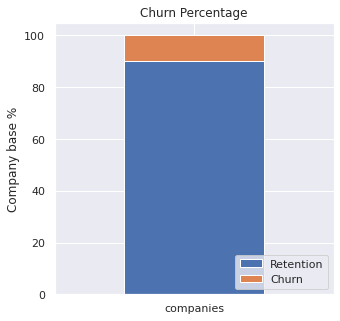

In [20]:
plot_stack_bars(churn_percentage.transpose(),"Churn Percentage",(5,5),legend_='lower right')

In [21]:
#Activities
activities = train[['id','activity_new','churn']]

In [22]:
activities = activities.groupby(['activity_new','churn'])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)

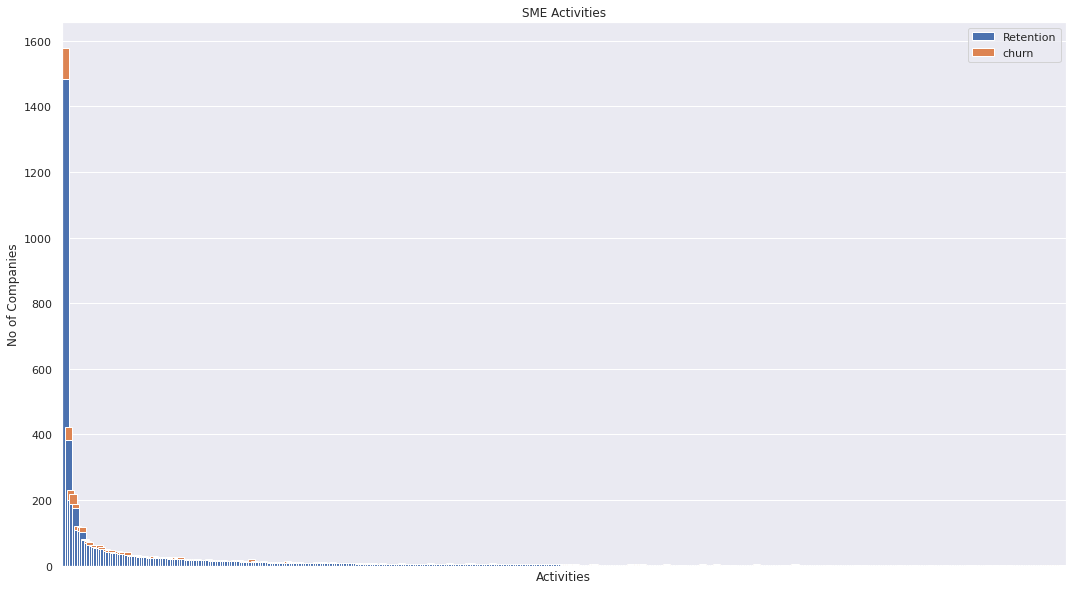

In [23]:
activities.plot(kind='bar',
                stacked = True,
                title='SME Activities',
                figsize=(18,10),
                width = 3)
plt.xlabel('Activities')
plt.ylabel('No of Companies')

plt.legend(['Retention','churn'],loc='upper right')
plt.xticks([])
plt.show()

In [24]:
activities

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0
...,...,...
opoiuuwdmxdssidluooopfswlkkkcsxf,NaN,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,NaN,2.0
wceaopxmdpccxfmcdpopulcaubcxibuw,NaN,1.0


In [25]:
activity_total = activities.fillna(0)[0] + activities.fillna(0)[1]
activity_percentage = (activities.fillna(0)[1]/activity_total) * 100

pd.DataFrame({'Percentage Churn': activity_percentage, 
              'Total Companies': activity_total}).sort_values(by='Percentage Churn', ascending=False)

,Percentage Churn,Total Companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.0,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.0,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.0,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.0,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.0,2.0
...,...,...
pudsxpkefiudxxfcumemocbpuklxiufa,0.0,8.0
ambaaxsxxwfuspsuabupewfpbbksmcoo,0.0,2.0
sbolemmfddlosupuwbcawusmbwmdmdfw,0.0,2.0


In [26]:
sales = train[['id','channel_sales','churn']]

In [27]:
sales = sales.groupby(['channel_sales','churn'])['id'].count().unstack(level=1).fillna(0)

In [28]:
sales

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [29]:
sales.sum(axis=1)

channel_sales
epumfxlbckeskwekxbiuasklxalciiuu       4.0
ewpakwlliwisiwduibdlfmalxowmwpci     966.0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0
foosdfpfkusacimwkcsosbicdxkicaua    7377.0
lmkebamcaaclubfxadlmueccxoimlema    2073.0
sddiedcslfslkckwlfkdpoeeailfpeds      12.0
usilxuppasemubllopkaafesmlibmsdf    1444.0
dtype: float64

In [30]:
sales_channel = (sales.div(sales.sum(axis=1), axis=0) * 100).sort_values(by=[1],ascending=False)

In [31]:
sales_channel

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


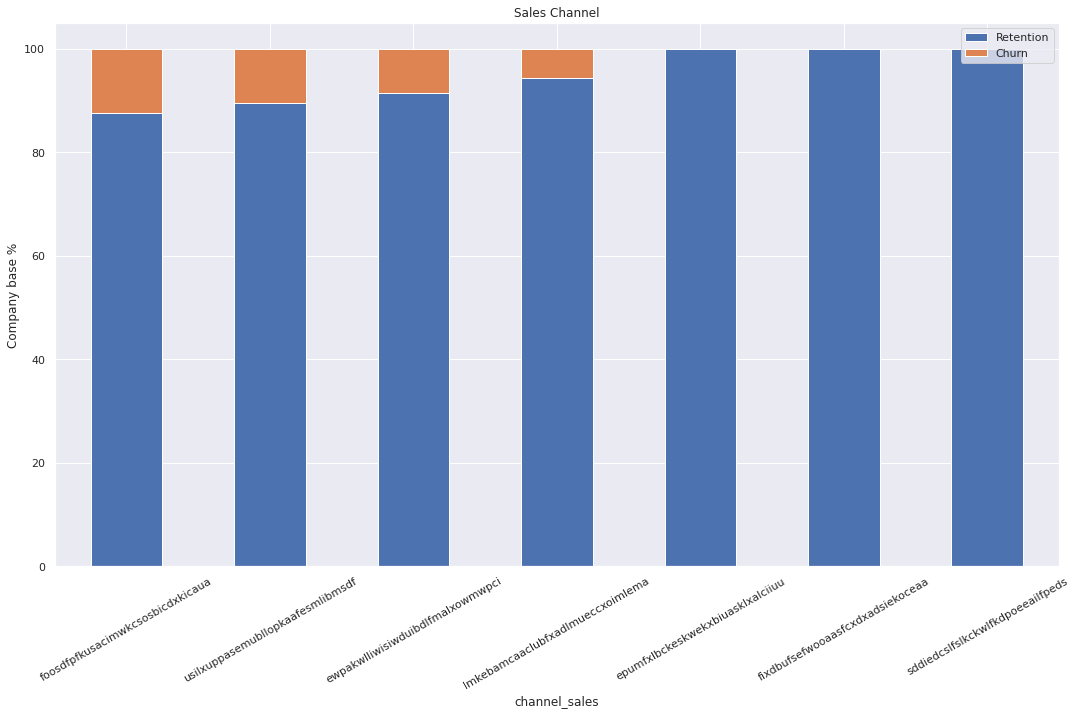

In [32]:
plot_stack_bars(sales_channel,'Sales Channel',rot_=30)

In [33]:
sales

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0


In [34]:
sales_total = sales.fillna(0)[0] + sales.fillna(0)[1]
sales_percentage = (sales.fillna(0)[1]/sales_total) * 100

pd.DataFrame({'Percentage of churn': sales_percentage,
              'Total channel':sales_total}).sort_values(by=['Percentage of churn'],
                                                        ascending=False)

,Percentage of churn,Total channel
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


In [35]:
consumptions = train[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]

In [36]:
consumptions.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,48ada52261e7cf58715202705a0451c9,309275,0,10025,831.8,f,0
1,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.0,t,1
2,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.0,f,0
3,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.0,f,0
4,bba03439a292a1e166f80264c16191cb,1584,0,0,0.0,f,0


In [37]:
def plot_distribution(dataframe, column, ax, bins_ = 50):
    temp = pd.DataFrame({'Retention':dataframe[dataframe['churn']==0][column],
                         'Churn':dataframe[dataframe['churn']==1][column]})
    temp[['Retention','Churn']].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

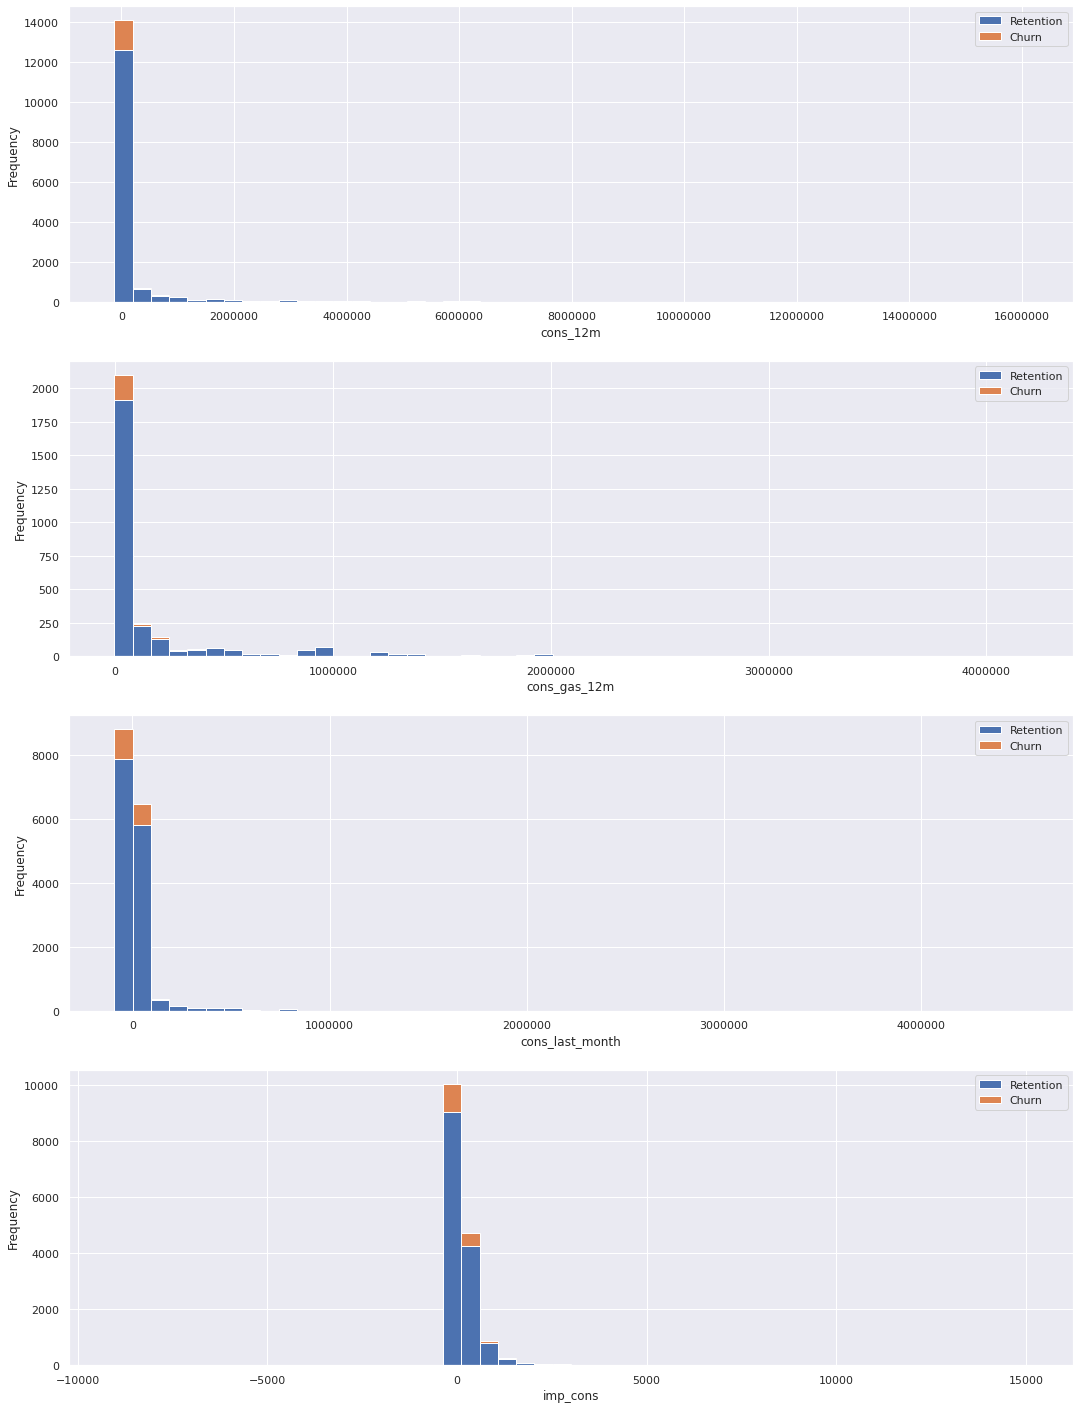

In [38]:
fig, axes = plt.subplots(nrows=4, figsize=(18,25))
plot_distribution(consumptions,'cons_12m',axes[0])
plot_distribution(consumptions[consumptions['has_gas']=='t'],'cons_gas_12m',axes[1])
plot_distribution(consumptions,'cons_last_month',axes[2])
plot_distribution(consumptions,'imp_cons',axes[3])

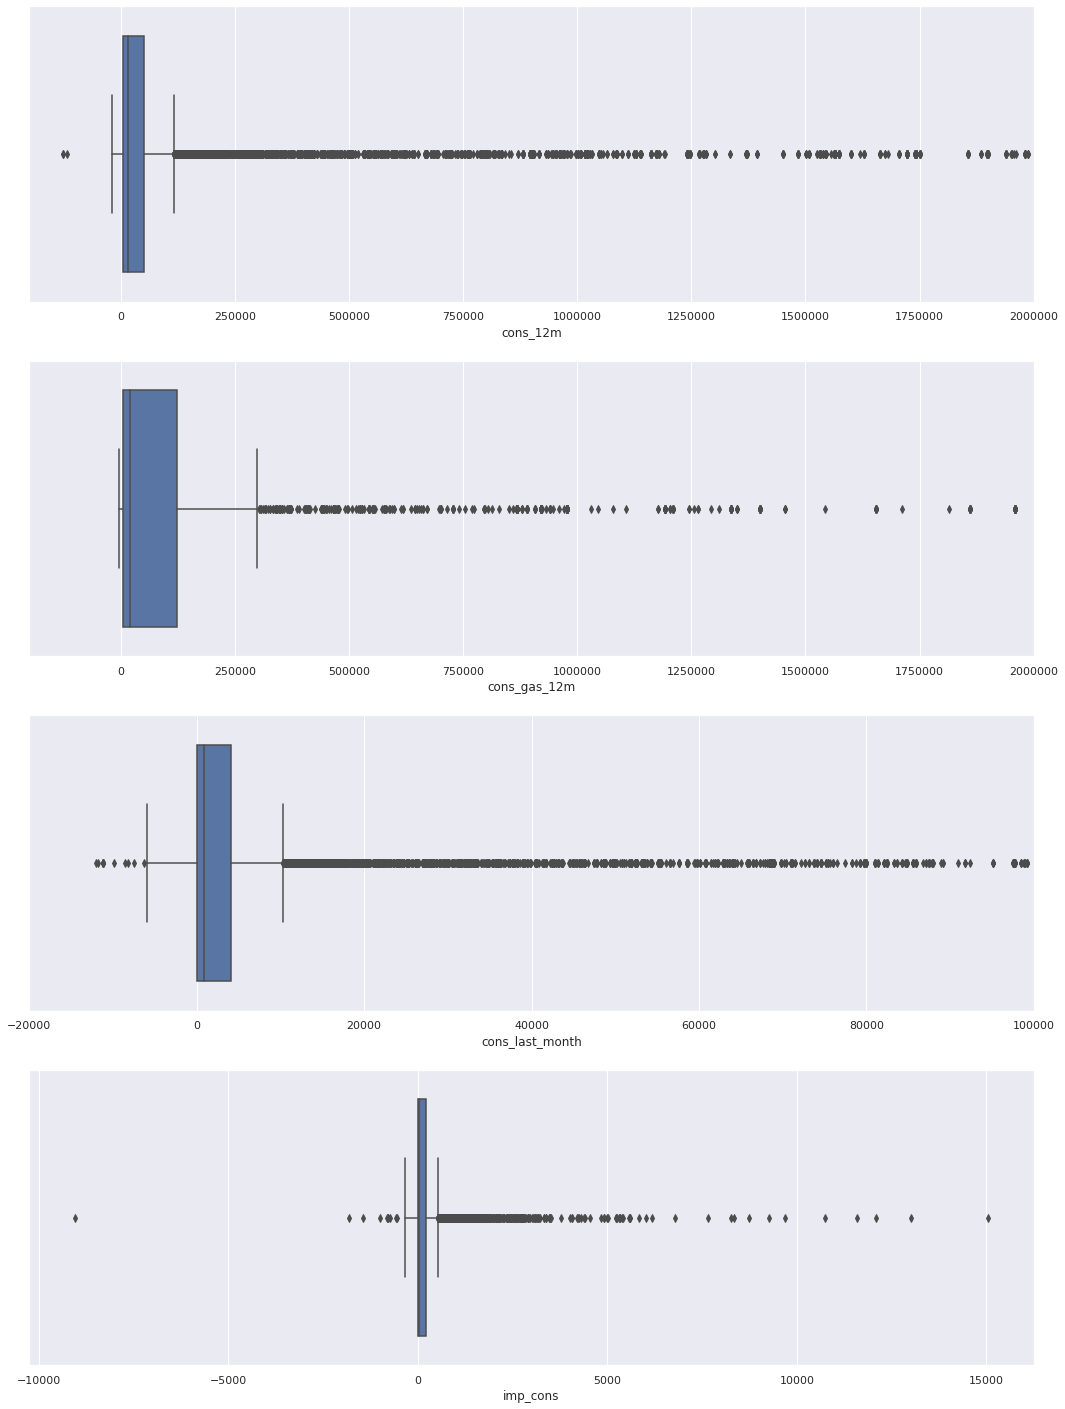

In [39]:
fix, axs = plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumptions['cons_12m'], ax=axs[0])
sns.boxplot(consumptions[consumptions['has_gas']=='t']['cons_gas_12m'], ax=axs[1])
sns.boxplot(consumptions['cons_last_month'], ax=axs[2])
sns.boxplot(consumptions['imp_cons'], ax=axs[3])

for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
# Set x-axis limit
axs[0].set_xlim(-200000, 2000000)
axs[1].set_xlim(-200000, 2000000)
axs[2].set_xlim(-20000, 100000)
plt.show()

In [40]:
dates = train[['id','date_activ','date_end','date_modif_prod','date_renewal','churn']].copy()

In [41]:
dates.head(5)

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,NaN,2015-06-23,1
2,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0
3,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0
4,bba03439a292a1e166f80264c16191cb,2010-03-30,2016-03-30,2010-03-30,2015-03-31,0


In [42]:
dates['date_activ'] = pd.to_datetime(dates['date_activ'], format='%Y-%m-%d')
dates['date_end'] = pd.to_datetime(dates['date_end'], format='%Y-%m-%d')
dates['date_modif_prod'] = pd.to_datetime(dates['date_modif_prod'],format='%Y-%m-%d')
dates['date_renewal'] = pd.to_datetime(dates['date_renewal'],format='%Y-%m-%d')

In [43]:
dates.head(4)

,id,date_activ,date_end,date_modif_prod,date_renewal,churn
0,48ada52261e7cf58715202705a0451c9,2012-11-07,2016-11-06,2012-11-07,2015-11-09,0
1,24011ae4ebbe3035111d65fa7c15bc57,2013-06-15,2016-06-15,NaT,2015-06-23,1
2,d29c2c54acc38ff3c0614d0a653813dd,2009-08-21,2016-08-30,2009-08-21,2015-08-31,0
3,764c75f661154dac3a6c254cd082ea7d,2010-04-16,2016-04-16,2010-04-16,2015-04-17,0


In [48]:
def plot_dates(dataframe, column, fontsize_=12):
    """
    Plot monthly churn and retention distribution
    """
    # Group by month
    temp = dataframe[[column,
                      "churn",
                      "id"]].set_index(column).groupby([pd.Grouper(freq='M'),
                                                        "churn"]).count().unstack(level=1)
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    # Change xlabel size
    plt.xticks(fontsize=fontsize_)
    # Rename y-axis
    plt.ylabel("Number of companies")
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

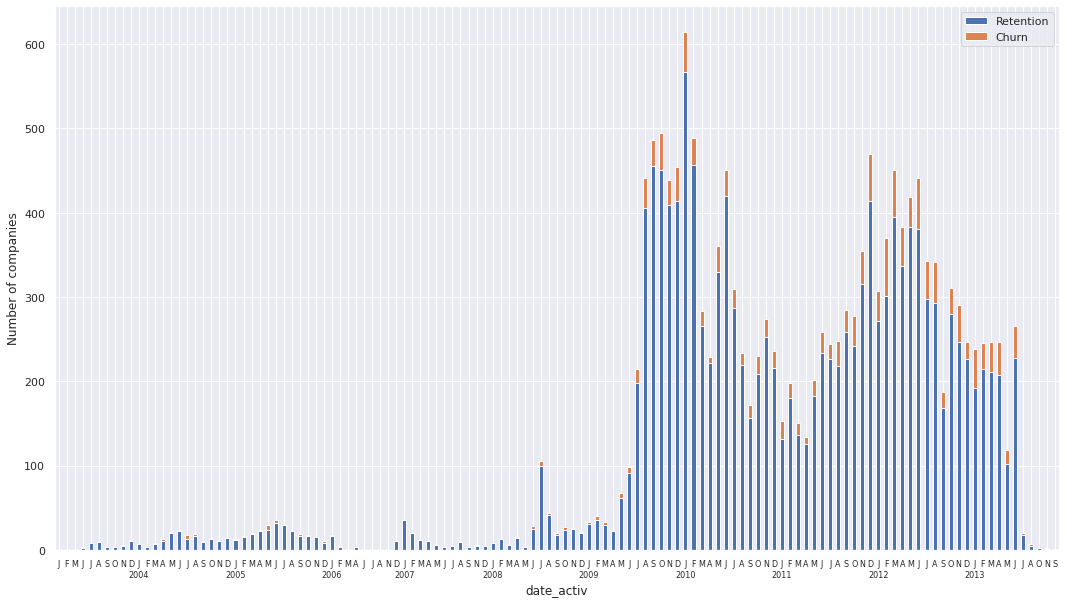

In [49]:
plot_dates(dates,'date_activ', fontsize_=8)

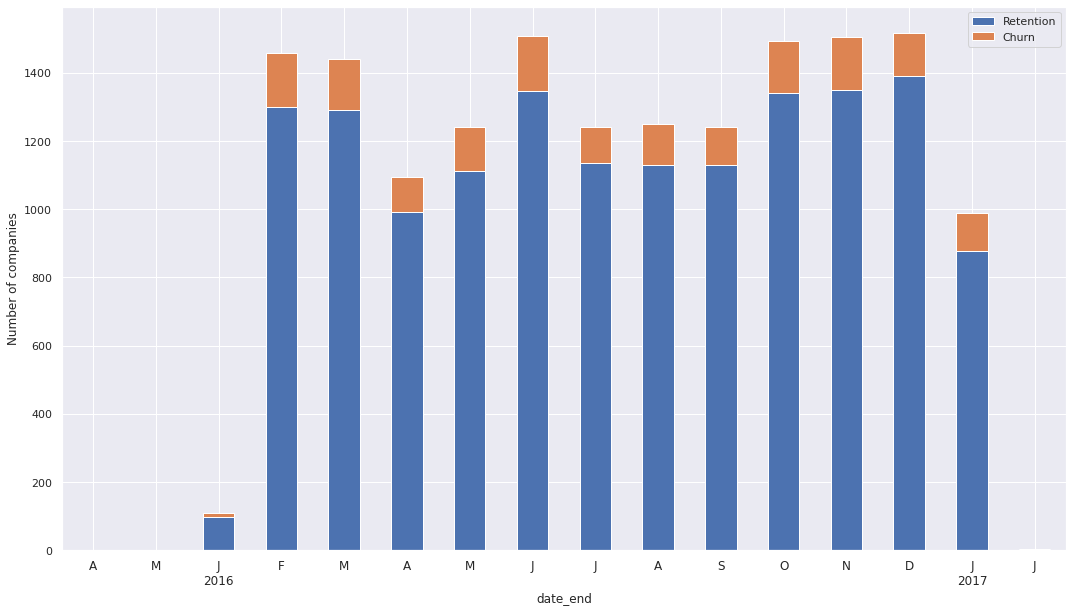

In [50]:
plot_dates(dates, 'date_end')

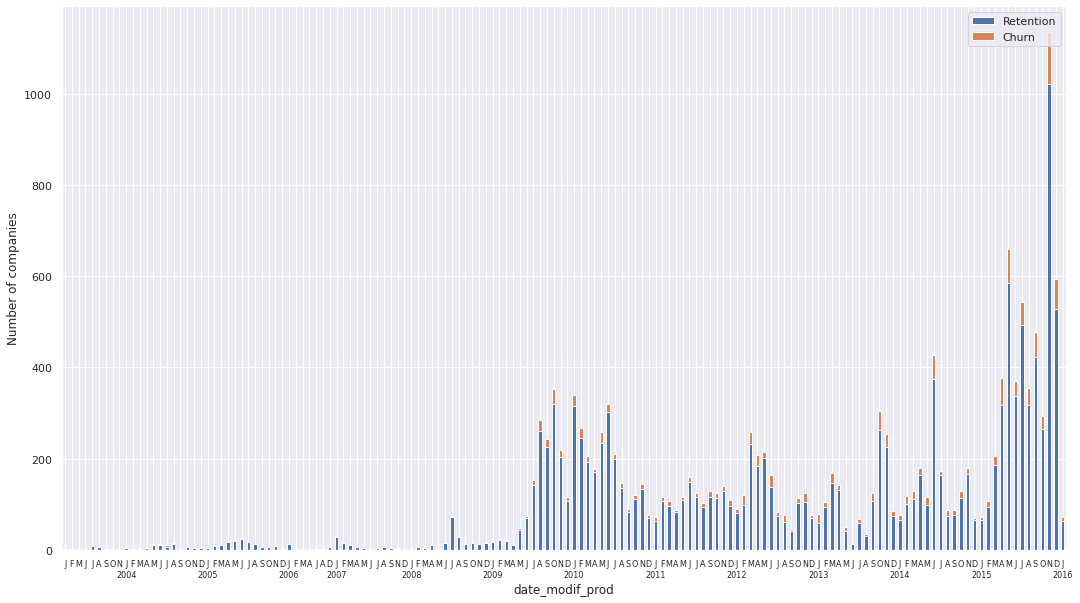

In [53]:
plot_dates(dates,'date_modif_prod',fontsize_=8)

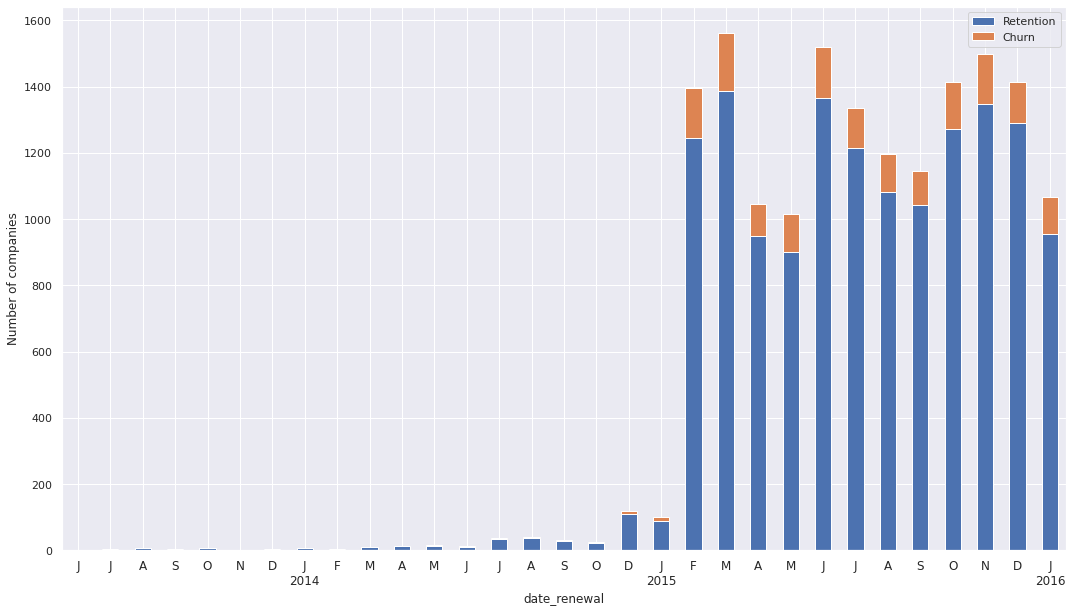

In [54]:
plot_dates(dates,'date_renewal')

In [55]:
forecast = train[['id','forecast_base_bill_ele','forecast_base_bill_year',
                  'forecast_bill_12m','forecast_cons','forecast_cons_12m',
                  'forecast_cons_year','forecast_discount_energy',
                  'forecast_meter_rent_12m','forecast_price_energy_p1',
                  'forecast_price_energy_p2','forecast_price_pow_p1','churn']]

In [56]:
forecast

,id,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,churn
0,48ada52261e7cf58715202705a0451c9,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,0
16092,d0a6f71671571ed83b2645d23af6de00,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,0


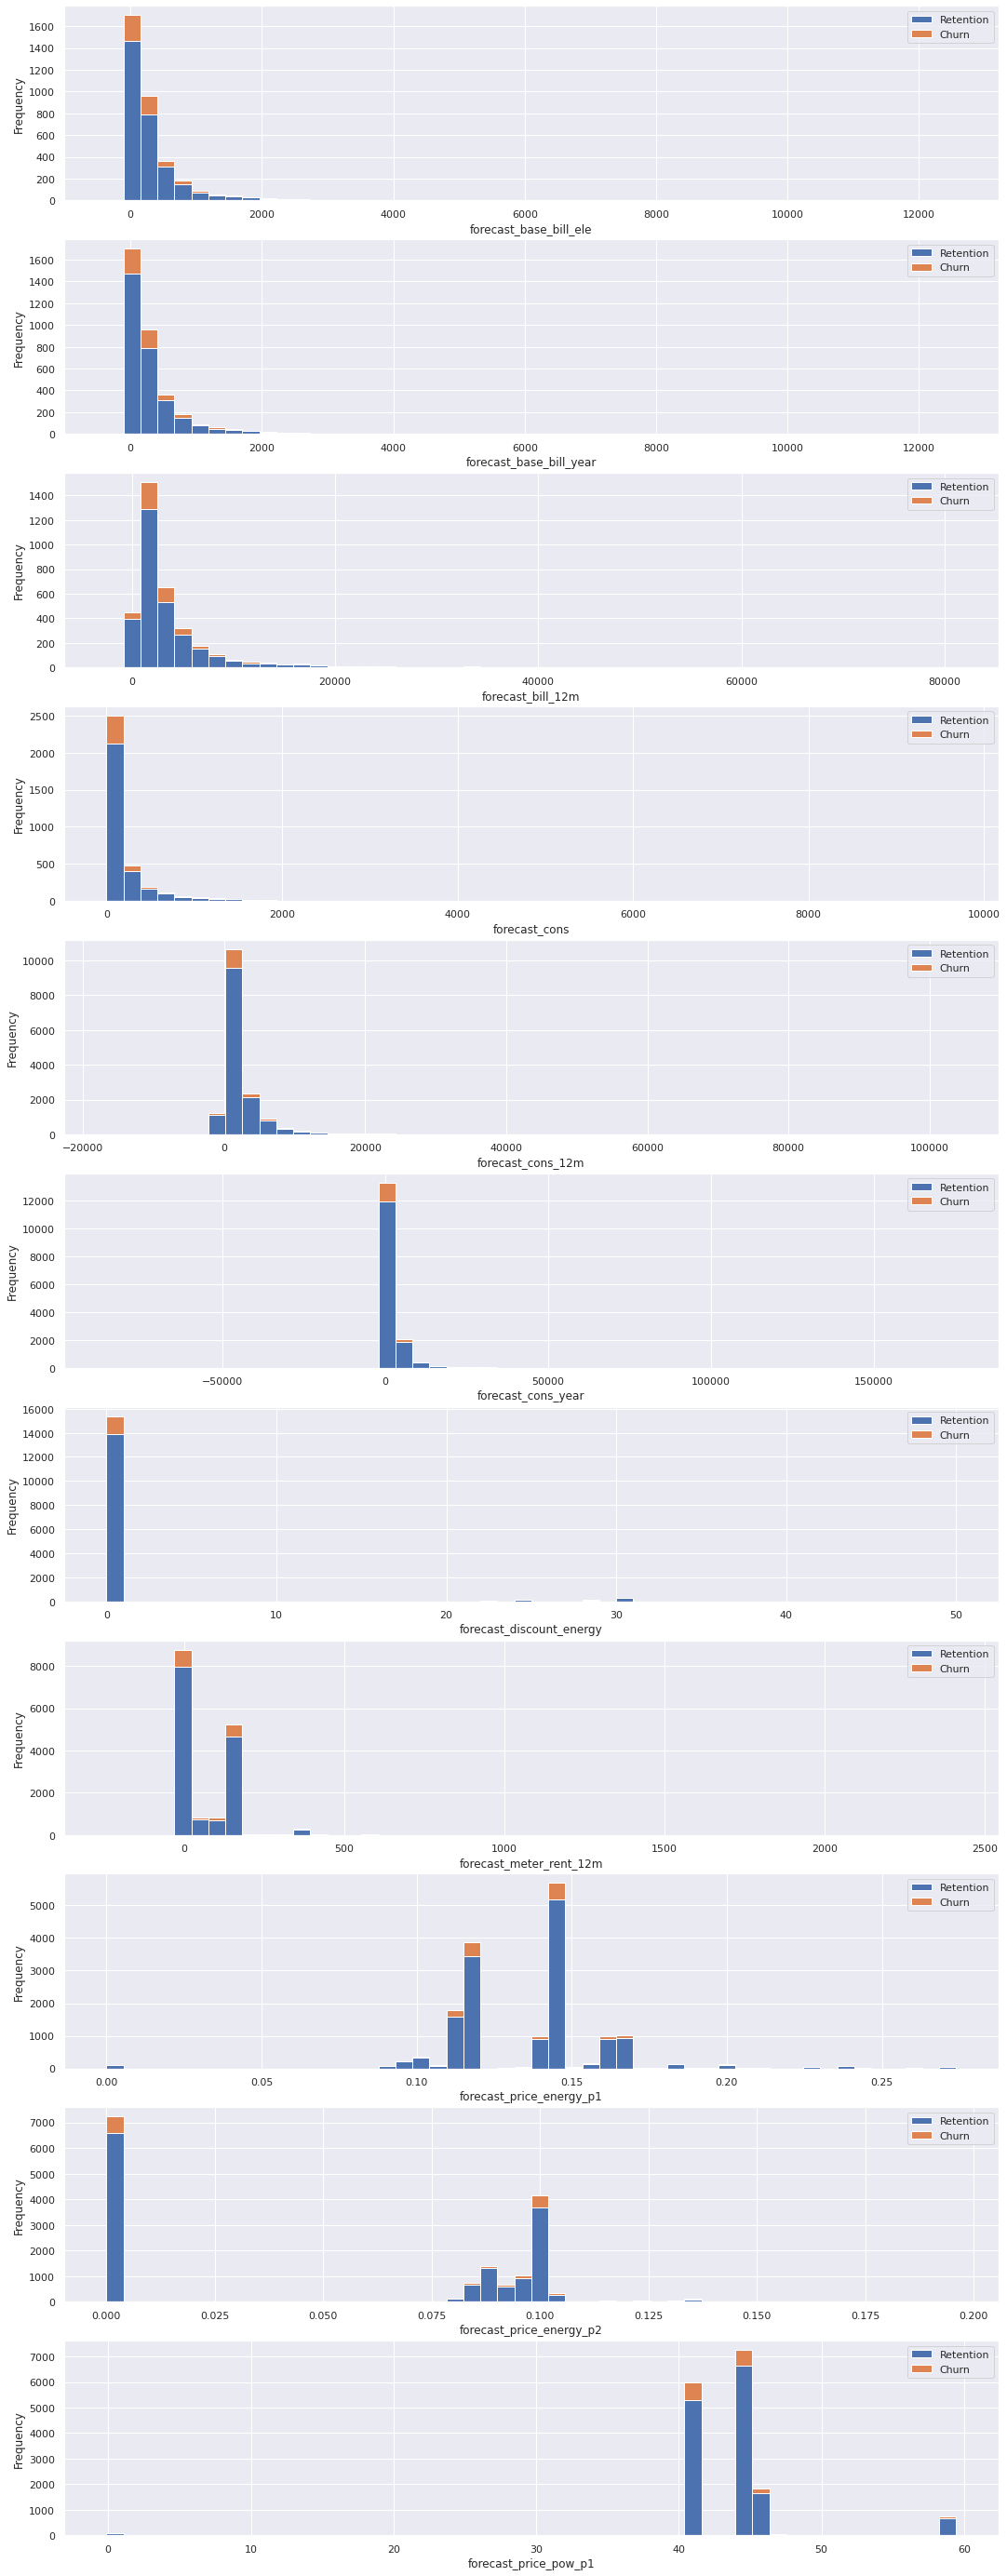

In [60]:
fig, axes = plt.subplots(nrows=11, figsize=(18,50))

plot_distribution(forecast,'forecast_base_bill_ele', axes[0])
plot_distribution(forecast,'forecast_base_bill_year', axes[1])
plot_distribution(forecast,'forecast_bill_12m', axes[2])
plot_distribution(forecast,'forecast_cons', axes[3])
plot_distribution(forecast,'forecast_cons_12m', axes[4])
plot_distribution(forecast,'forecast_cons_year', axes[5])
plot_distribution(forecast,'forecast_discount_energy', axes[6])
plot_distribution(forecast,'forecast_meter_rent_12m', axes[7])
plot_distribution(forecast,'forecast_price_energy_p1', axes[8])
plot_distribution(forecast,'forecast_price_energy_p2', axes[9])
plot_distribution(forecast,'forecast_price_pow_p1', axes[10])


In [61]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

In [62]:
margin

,id,margin_gross_pow_ele,margin_net_pow_ele,net_margin
0,48ada52261e7cf58715202705a0451c9,-41.76,-41.76,1732.36
1,24011ae4ebbe3035111d65fa7c15bc57,25.44,25.44,678.99
2,d29c2c54acc38ff3c0614d0a653813dd,16.38,16.38,18.89
3,764c75f661154dac3a6c254cd082ea7d,28.60,28.60,6.60
4,bba03439a292a1e166f80264c16191cb,30.22,30.22,25.46
...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,27.88,27.88,381.77
16092,d0a6f71671571ed83b2645d23af6de00,0.00,0.00,90.34
16093,10e6828ddd62cbcf687cb74928c4c2d2,39.84,39.84,20.38
16094,1cf20fd6206d7678d5bcafd28c53b4db,13.08,13.08,0.96


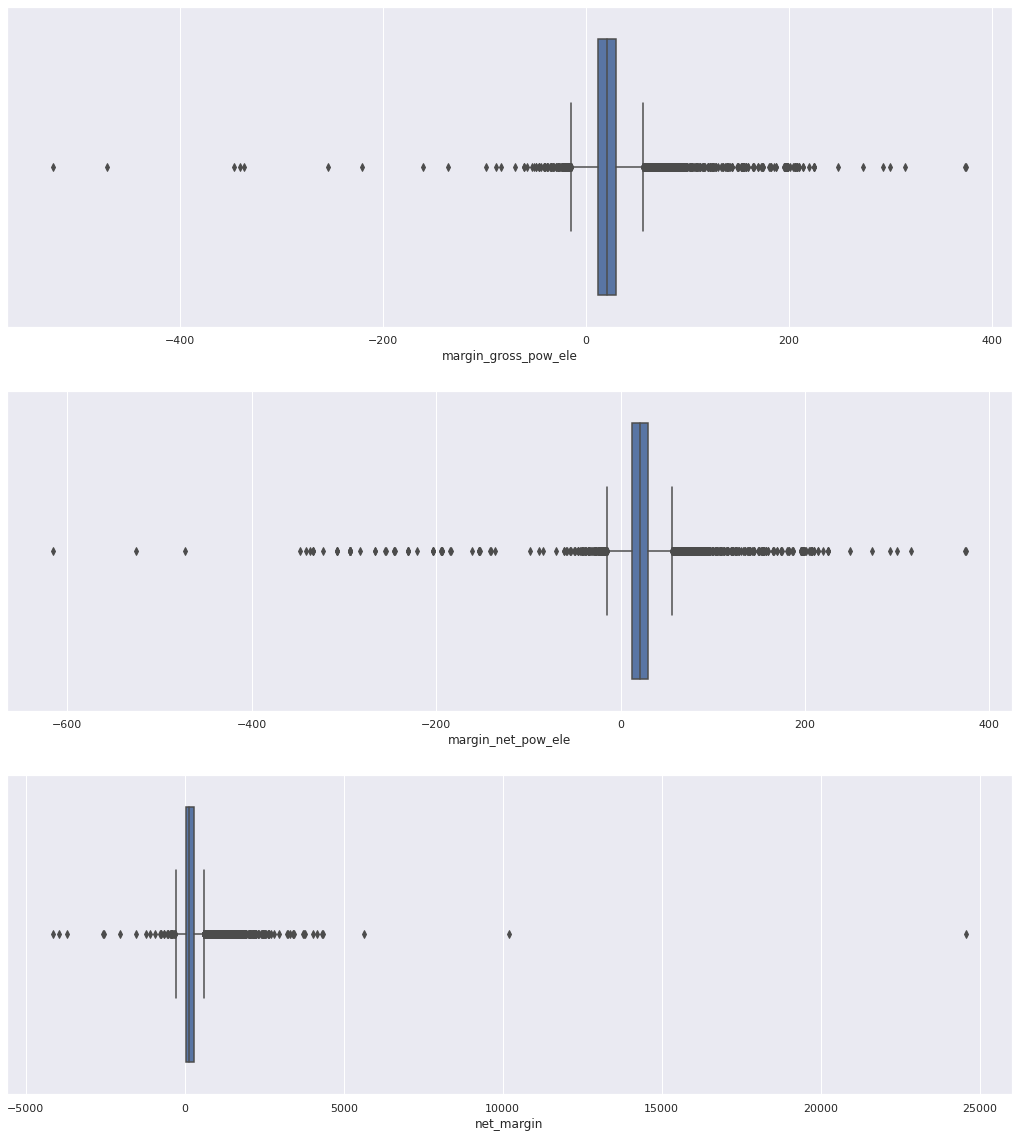

In [63]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

In [64]:
power = train[["id","pow_max", "churn"]].fillna(0)

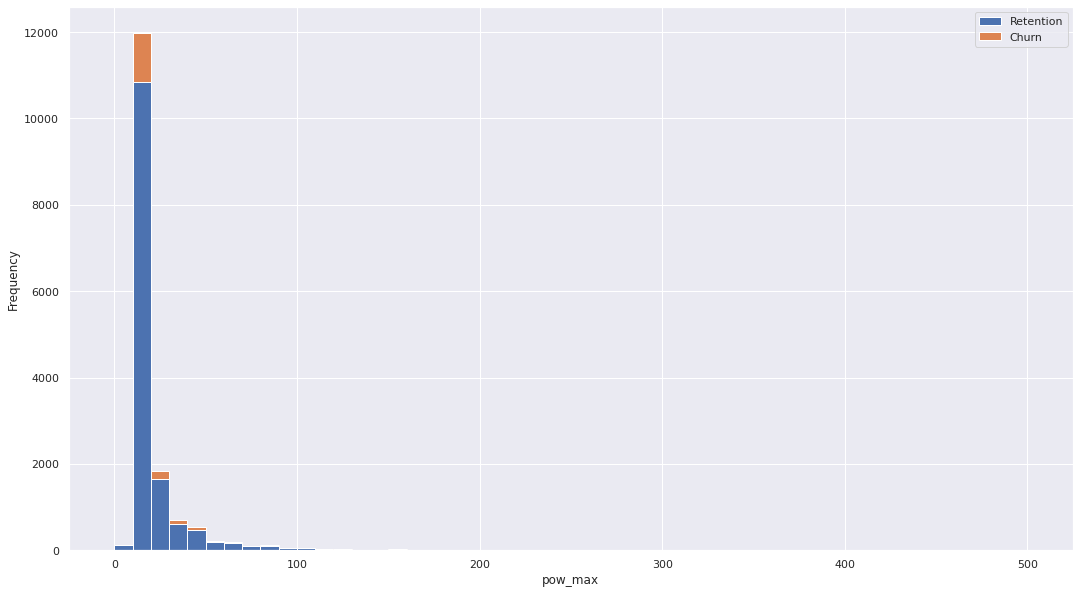

In [65]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

In [66]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [69]:
others

,id,nb_prod_act,num_years_antig,origin_up,churn
0,48ada52261e7cf58715202705a0451c9,1,3,ldkssxwpmemidmecebumciepifcamkci,0
1,24011ae4ebbe3035111d65fa7c15bc57,2,3,lxidpiddsbxsbosboudacockeimpuepw,1
2,d29c2c54acc38ff3c0614d0a653813dd,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
3,764c75f661154dac3a6c254cd082ea7d,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
4,bba03439a292a1e166f80264c16191cb,1,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,0
...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,2,4,lxidpiddsbxsbosboudacockeimpuepw,0
16092,d0a6f71671571ed83b2645d23af6de00,1,3,lxidpiddsbxsbosboudacockeimpuepw,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,1,4,lxidpiddsbxsbosboudacockeimpuepw,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,1,3,lxidpiddsbxsbosboudacockeimpuepw,0


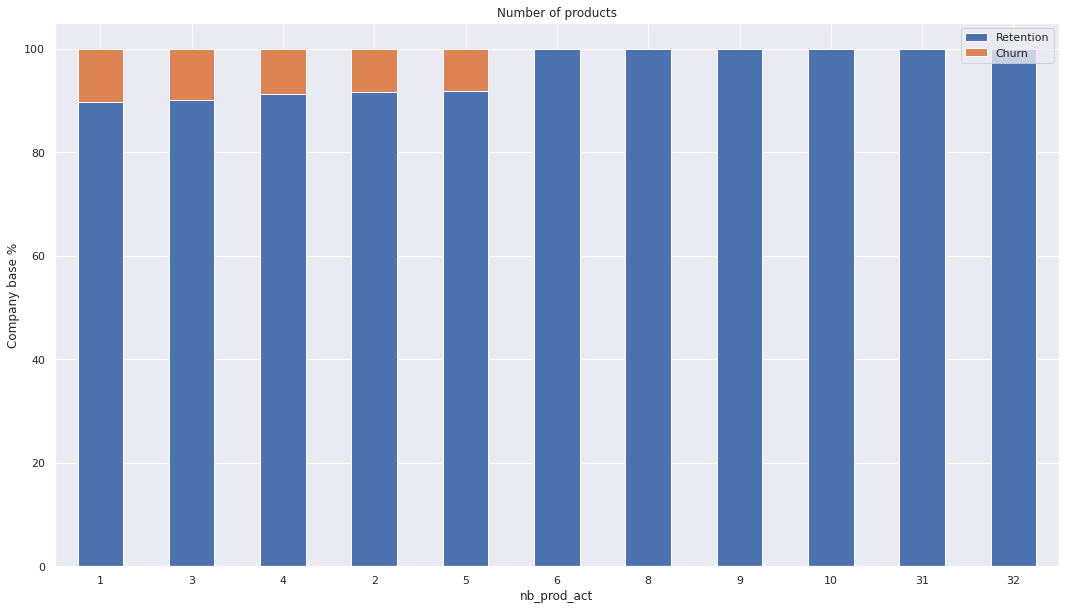

In [71]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stack_bars(products_percentage, "Number of products")

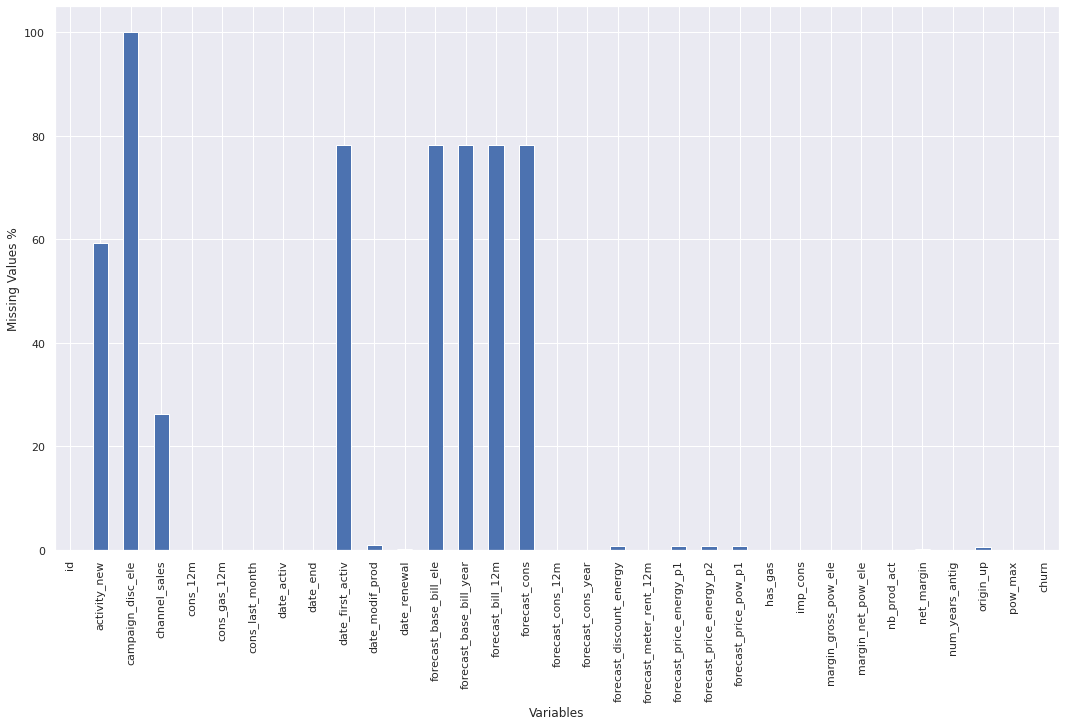

In [75]:
(train.isnull().sum()/len(train.index) *100).plot(kind='bar',figsize=(18,10))
plt.xlabel('Variables')
plt.ylabel('Missing Values %')
plt.show()

In [76]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
                    "forecast_base_bill_ele","forecast_base_bill_year",
                    "forecast_bill_12m", "forecast_cons"], inplace=True)

In [77]:
train.drop_duplicates(inplace=True)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_modif_prod           15939 non-null  object 
 9   date_renewal              16056 non-null  object 
 10  forecast_cons_12m         16096 non-null  float64
 11  forecast_cons_year        16096 non-null  int64  
 12  forecast_discount_energy  15970 non-null  float64
 13  forecast_meter_rent_12m   16096 non-null  float64
 14  foreca

In [83]:
train.loc[train['date_modif_prod'].isnull(),
          'date_modif_prod'] = train['date_modif_prod'].value_counts().index[0]

(0        False
 1         True
 2        False
 3        False
 4        False
          ...  
 16091    False
 16092    False
 16093    False
 16094    False
 16095    False
 Name: date_modif_prod, Length: 16096, dtype: bool,
 'date_modif_prod')

In [84]:
train.loc[train['date_end'].isnull(),'date_end'] = train['date_end'].value_counts().index[0]
train.loc[train['date_renewal'].isnull(),
          'date_renewal']=train['date_renewal'] = train['date_renewal'].value_counts().index[0]

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16096 non-null  object 
 8   date_modif_prod           15939 non-null  object 
 9   date_renewal              16096 non-null  object 
 10  forecast_cons_12m         16096 non-null  float64
 11  forecast_cons_year        16096 non-null  int64  
 12  forecast_discount_energy  15970 non-null  float64
 13  forecast_meter_rent_12m   16096 non-null  float64
 14  foreca

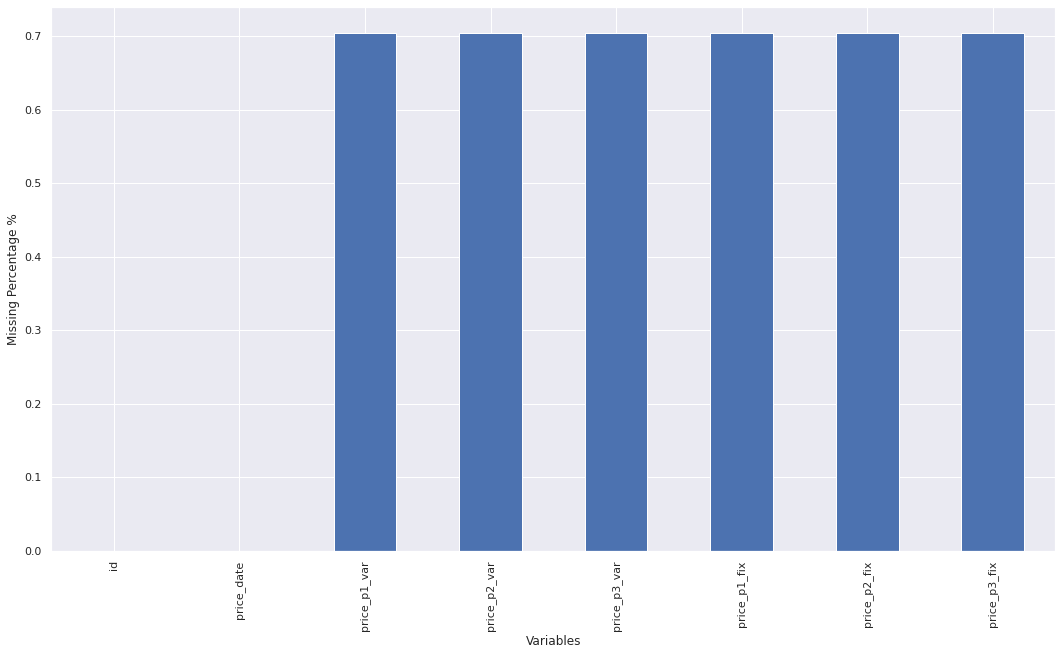

In [90]:
(data_hist.isnull().sum()/len(data_hist.index) * 100).plot(kind='bar', figsize=(18,10))
plt.xlabel('Variables')
plt.ylabel('Missing Percentage %')
plt.show()

In [91]:
data_hist.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var',
       'price_p1_fix', 'price_p2_fix', 'price_p3_fix'],
      dtype='object')

In [92]:
data_hist.loc[data_hist['price_p1_var'].isnull(),
              'price_p1_var'] = data_hist['price_p1_var'].median()
data_hist.loc[data_hist['price_p2_var'].isnull(),
              'price_p2_var'] = data_hist['price_p2_var'].median()
data_hist.loc[data_hist['price_p3_var'].isnull(),
              'price_p3_var'] = data_hist['price_p3_var'].median()
data_hist.loc[data_hist['price_p1_fix'].isnull(),
              'price_p1_fix'] = data_hist['price_p1_fix'].median()
data_hist.loc[data_hist['price_p2_fix'].isnull(),
              'price_p2_fix'] = data_hist['price_p2_fix'].median()
data_hist.loc[data_hist['price_p3_fix'].isnull(),
              'price_p3_fix'] = data_hist['price_p3_fix'].median()

In [95]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  193002 non-null  float64
 3   price_p2_var  193002 non-null  float64
 4   price_p3_var  193002 non-null  float64
 5   price_p1_fix  193002 non-null  float64
 6   price_p2_fix  193002 non-null  float64
 7   price_p3_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [96]:
train["date_activ"] = pd.to_datetime(train["date_activ"], format='%Y-%m-%d')
train["date_end"] = pd.to_datetime(train["date_end"], format='%Y-%m-%d')
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format='%Y-%m-%d')
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format='%Y-%m-%d')

In [98]:
data_hist["price_date"] = pd.to_datetime(data_hist["price_date"], format='%Y-%m-%d')

In [99]:
data_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [101]:
data_hist[(data_hist.price_p1_fix < 0) | (data_hist.price_p2_fix < 0) | (data_hist.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [102]:
data_hist.loc[data_hist['price_p1_fix'] < 0,
              'price_p1_fix'] = data_hist['price_p1_fix'].median()
data_hist.loc[data_hist['price_p2_fix'] < 0,
              'price_p2_fix'] = data_hist['price_p2_fix'].median()
data_hist.loc[data_hist['price_p3_fix'] < 0,
              'price_p3_fix'] = data_hist['price_p3_fix'].median()

In [103]:
data_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
